# Setup

In [ ]:
!pip install sentencepiece
!pip install fastai

!pip install nbd-colab

from nbd_colab import *

drive_setup()
home_dir()

repo_name = 'bonltk'
change_dir(f'/content/drive/My Drive/Notebooks/Esukhia/{repo_name}')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········


# Imports

In [ ]:
from pathlib import Path

from fastai.basic_data import *
from fastai.text import *
import sentencepiece as spm

# Config

In [ ]:
# Paths
corpus_path = Path('.bonltk/data/corpora/base')
tokenizer_models_path = Path('.bonltk/models/tokenizers')
lm_path = Path('.bonltk/models/lm')
lm_path.mkdir(exist_ok=True)

seq_len = 150
seed = 43
valid_pct = 0.1

# Model

In [ ]:
class BoyigTokenizer(BaseTokenizer):
    def __init__(self, lang):
        self.lang = lang
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load(str(tokenizer_models_path/f'classical-unigram.model'))
        self.vocab = [self.sp.IdToPiece(int(i)) for i in range(30000)]
        
    def tokenizer(self, t):
        return self.sp.EncodeAsPieces(t)

In [ ]:
tok = BoyigTokenizer('bo')
boyig_cls_vocab = Vocab(tok.vocab)

In [ ]:
tokenizer = Tokenizer(tok_func=BoyigTokenizer, lang='bo')

In [ ]:
#data_lm = TextLMDataBunch.from_folder(path=corpus_path, tokenizer=tokenizer, vocab=boyig_cls_vocab)
#data_lm.save()

In [ ]:
data_lm = load_data(corpus_path, 'data_save.pkl')

In [ ]:
data_lm.show_batch()

In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=False)

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


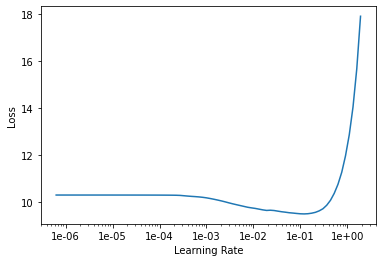

In [ ]:
learn.recorder.plot(show_moms=True)

In [ ]:
learn.fit_one_cycle(2, 7e-3, moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name='model')])

epoch,train_loss,valid_loss,accuracy,time
0,7.588704,7.535124,0.090883,21:16
1,7.447806,7.918716,0.090299,21:11


Better model found at epoch 0 with accuracy value: 0.09088257700204849.
Buffered data was truncated after reaching the output size limit.

In [ ]:
learn.save('2epoch')

In [ ]:
learn = learn.load('last-epoch')

In [ ]:
learn.fit_one_cycle(8, 7e-3, moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name='model')])

epoch,train_loss,valid_loss,accuracy,time
0,5.402917,5.342896,0.176061,21:06
1,5.496731,5.740491,0.152081,21:04


Better model found at epoch 0 with accuracy value: 0.1760607212781906.
Buffered data was truncated after reaching the output size limit.

In [ ]:
learn.save(f'last-epoch')

NameError: ignored

In [ ]:
learn.save_encoder('finetuned')

In [ ]:
TEXT = '༄༅། །འདུལ་བ་ང་བཞུགས་སོ།།'
N_WORDS = 40
N_SENTENCES = 2
preds = [learn.predict(TEXT, N_WORDS, temperature=0.75) 
         for _ in range(N_SENTENCES)]

print("\n".join([pred.replace('▁', '').replace('xxunk', '').replace(' ', '') for pred in preds]))

༅།།འདུལ་བ་ང་བཞུགས་སོ།།ཆར་ཡང་དུ་འགྲོ་བདེ་ཡང་དེ་བཞིན་དུ་།ཀྱི།བདུད་ཀྱི་།ནི་དེ་དག་།ཡོད་པ་བོད་སྐད་དུ།།།ར་གྱུར་ཏོ།།ལོངས་སྤྱོད་པ་།།དེའི་ཕྱིར་སུ་འོ།རྣམས་ལ་།།ཁོང་ཁྲོ་མཉམ་པར་གཞག་ས་མི་མངའ་བ།།དེ་ལྟར་།བ་སྲས་ཀྱི་།།ཁྱད་པར་ནི་ཀུན།ཉིད་དུ་
༅།།འདུལ་བ་ང་བཞུགས་སོ།།ནས་མཐོང་བས་།།དཀའ་བས་བྱུང་བ་དག་ནི་སྤོབས་པ་ཞེས་།དང་།ཡོན་ཏན་མཛད།།མ་།།དང་།དང་།ལ་སོགས་པ་ལ།།།འདིར་གང་ཞེས་བྱ་བ་ནི་ཡིན་ཞེ་ན།ཡིས་དེ་།།དེ་ཡོན་ཏན་།གོ་འཕང་དང་།རྣམས་ཀྱི་བསྟེན་པ་དཀའ་ཐུབ་།


In [ ]:
list(cls_ug_tok(['༄༅། །འདུལ་བ་ང་བཞུགས་སོ།།']))

[['▁', '༄', '༅།', '▁།', 'འདུལ་བ་', 'ང་', 'བཞུགས་སོ།', '།']]